In [5]:
import rfnetwork as rfn
import numpy as np
import matplotlib.pyplot as plt

## Bandstop Filter

Generate 3rd order bandstop filter with stopband from 70 to 150 MHz.

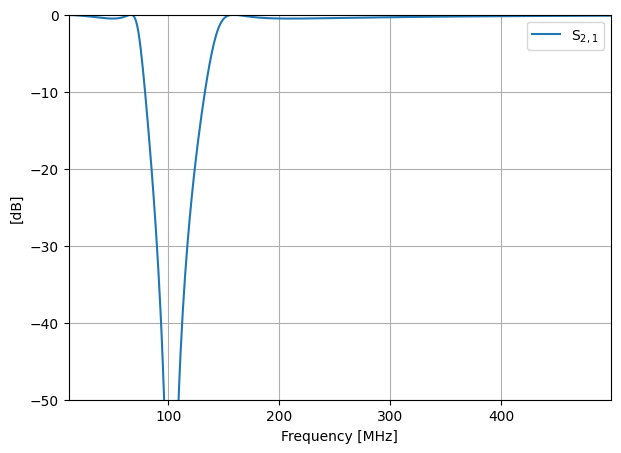

In [6]:

bpf = rfn.filters.bp_filter(fc1=70e6, fc2=150e6, n=3, mode="bandstop")

frequency = np.arange(10e6, 0.5e9, 1e6)
ax = bpf.plot(frequency, 21, freq_unit="mhz")
ax.set_ylim([-50, 0]);

## Bandpass Filter

Flip the bandstop filter to a 3rd order bandposs filter with the same cutoff frequencies

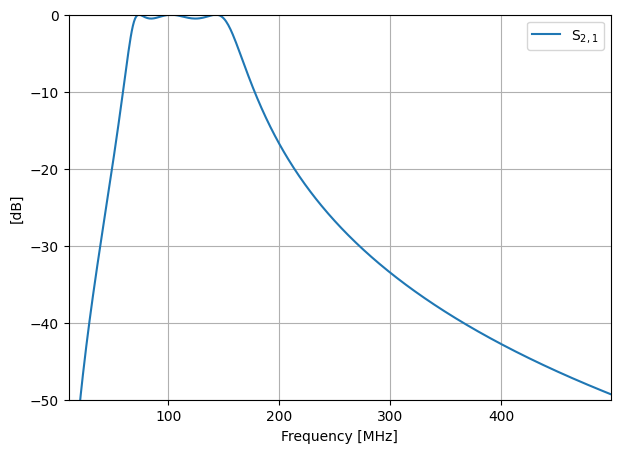

In [7]:
bpf = rfn.filters.bp_filter(fc1=70e6, fc2=150e6, n=3, mode="bandpass")

frequency = np.arange(10e6, 0.5e9, 1e6)
ax = bpf.plot(frequency, 21, freq_unit="mhz")
ax.set_ylim([-50, 0]);

## Lowpass Filter

Generate Figures 8.27a (0.5 Ripple) in Pozar 4th ed.

Text(0, 0.5, 'Attenuation [dB]')

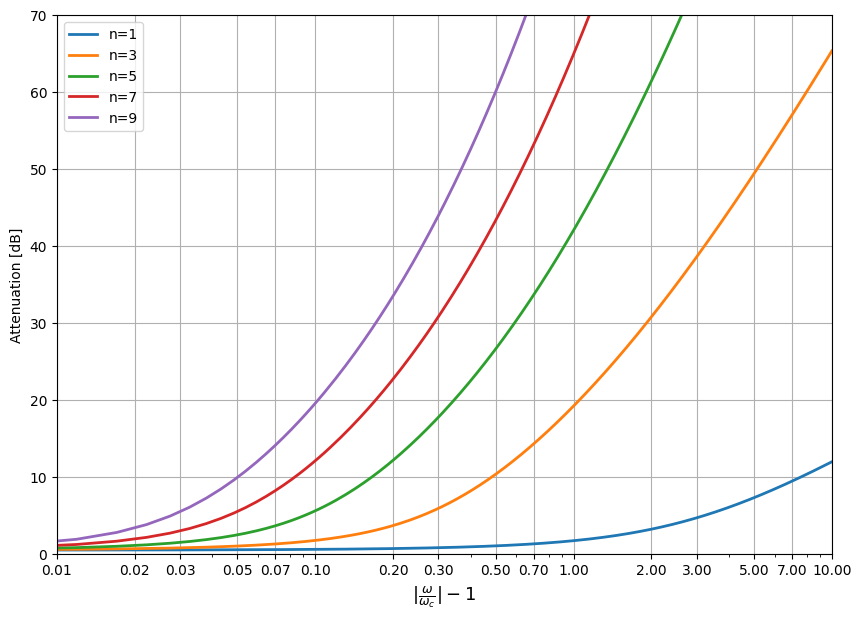

In [8]:
fc = 150e6
frequency = np.logspace(0, 11, 5000)
n_list = [1, 3, 5, 7, 9]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for n in n_list:
    # build lowpass filter network
    fn = rfn.filters.lp_filter(fc, n)
    sdata = fn.evaluate(frequency)["s"]
    ax.plot((frequency / fc) - 1, -rfn.conv.db20_lin(sdata.sel(b=2, a=1)), linewidth=2)

# plot formatting
ax.set_ylim([0, 70])
ax.set_xscale("log")
ax.set_xlim([10e-2, 10])
ax.grid(True)
base_xticks = np.array([1, 2, 3, 5, 7])
xticks = np.concatenate([
        base_xticks * 1e-2, base_xticks * 1e-1, base_xticks, [10]
])
ax.set_xticks(xticks)

ax.set_xticklabels(
    xticks,
    fontsize=10
)
ax.xaxis.set_major_formatter(lambda x, pos: f"{x:.2f}")
ax.legend([f"n={n}" for n in n_list])
ax.set_xlabel(r"$|\frac{\omega}{\omega_c}| - 1$", fontsize=13)
ax.set_ylabel("Attenuation [dB]")